In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Вводим нашу выборку, согласно варианту

In [2]:
y = np.array([4.67, 4.03, 3.45, 3.7, 3.19, 4.35, 3.6, 4.22, 3.25, 3.03, 3.49, 3.41, 4.3, 3.7, 4.74, 3.07, 4.56, 3.6, 3.36, 3.79, 4.5, 4.0, 3.82, 4.58])
X = np.array([[4.9, 3.98, 4.46, 5.3, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 5.0], [4.07, 3.29, 3.96, 4.48, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0], [3.39, 3.97, 4.06, 3.76, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 5.0], [3.55, 3.4, 4.48, 3.44, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0], [3.44, 3.94, 3.9, 3.11, 4.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0], [4.29, 4.57, 4.05, 4.41, 4.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0], [3.59, 3.45, 4.16, 3.21, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0], [4.08, 3.48, 3.57, 4.06, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0], [3.31, 3.14, 3.19, 3.33, 4.0, 3.0, 5.0, 5.0, 4.0, 5.0, 5.0], [3.2, 3.5, 3.17, 2.91, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0], [3.47, 3.68, 3.43, 3.51, 5.0, 5.0, 5.0, 5.0, 4.0, 3.0, 5.0], [3.32, 3.22, 3.34, 3.79, 3.0, 5.0, 4.0, 4.0, 5.0, 3.0, 5.0], [4.31, 4.89, 4.83, 4.83, 5.0, 3.0, 5.0, 5.0, 4.0, 3.0, 5.0], [3.76, 3.12, 3.68, 3.86, 5.0, 3.0, 4.0, 5.0, 5.0, 3.0, 5.0], [4.5, 3.48, 4.83, 4.31, 3.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0], [3.06, 3.29, 3.26, 2.86, 3.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0], [4.65, 4.82, 4.89, 3.99, 3.0, 3.0, 5.0, 5.0, 5.0, 4.0, 5.0], [3.54, 3.08, 4.13, 3.35, 4.0, 5.0, 4.0, 5.0, 4.0, 3.0, 5.0], [3.47, 3.39, 4.12, 3.03, 3.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0], [3.85, 3.4, 3.88, 3.33, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 5.0], [4.68, 4.42, 4.51, 5.12, 3.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0], [4.03, 3.56, 3.01, 4.46, 3.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0], [3.95, 3.16, 4.04, 3.81, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0], [4.65, 4.81, 4.5, 4.31, 3.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0]])

Разделяем выборку на обучающую, тестовую и валидационную

Обучающая используется для обучения моделей, тестовая для выбора лучшей модели, а валидационная - для итоговой оценки

Делим в соотношении 50/25/25

In [3]:
x_train, x_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.5)
x_validate, x_test, y_validate, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

Создаем наши модели.

Мы будем рассматривать модель множественной линейной регрессии с методом наименьших квадратов (MSE - Mean Squared Error) и модель со средней абсолютной разностью (MAE - Mean Absolute Error)

In [4]:
regression_mse = make_pipeline(
	StandardScaler(),
	LinearRegression()
)

regression_mae = make_pipeline(
	StandardScaler(),
	SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=10000, tol=1e-4)
)

Обучаем наши модели на обучающей выборке

In [5]:
regression_mae.fit(x_train, y_train)
regression_mse.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Рассчитываем качество моделей на тестовой выборке

In [6]:
score_mae = regression_mae.score(x_test, y_test)
score_mse = regression_mse.score(x_test, y_test)

"MSE - {}, MAE - {}".format(score_mse, score_mae)

'MSE - -16.930379508564286, MAE - 0.7731654437162534'

Выбираем лучшую модель

In [7]:
best_model = regression_mse if score_mse > score_mae else regression_mae
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(epsilon=0, loss='epsilon_insensitive',
                              max_iter=10000, tol=0.0001))])

Оцениваем результат на валидационной выборке

In [8]:
best_model.score(x_validate, y_validate)

0.6804215591595313

В идеале должен получиться положительный результат близкий к 1, например 0.7147298123123
Можно вручную достигнуть переобучения, перезапуская скрипт заново, пока значение не станет максимальным. Однако, это никак не улучшит работу модели на других выборках

Посмотрим какие предсказания дала нам модель, и какими значения оказались на самом деле

In [9]:
predicted = best_model.predict(x_validate)
predicted

array([4.02839538, 3.84996045, 3.54171345, 3.56537097, 4.76650156,
       4.13550863])

In [10]:
y_validate

array([3.82, 4.22, 3.45, 3.36, 4.5 , 4.03])

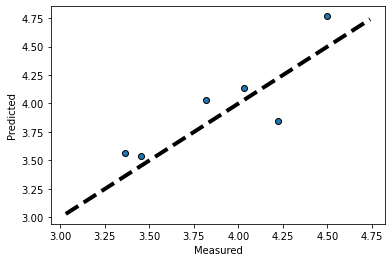

In [11]:
fig, ax = plt.subplots()
ax.scatter(y_validate, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()